In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
dataset=pd.read_csv("/content/sample_data/salaryData.csv")
print(dataset)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [24]:
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [25]:
dataset.tail(5)

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [26]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [27]:
dataset.shape

(30, 2)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [29]:
dataset.min()

YearsExperience        1.1
Salary             37731.0
dtype: float64

In [30]:
dataset.max()

YearsExperience        10.5
Salary             122391.0
dtype: float64

In [31]:
dataset.iloc[2:6]

,YearsExperience,Salary
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0


In [32]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [33]:
dataset.nunique()

YearsExperience    28
Salary             30
dtype: int64

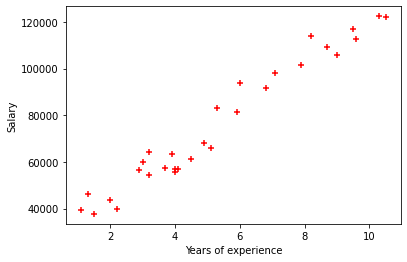

In [35]:
#visualization using scatter plot
x=dataset['YearsExperience']
y=dataset['Salary']

plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.scatter(x,y,color='red',marker='+')
plt.show()

In [36]:
#splitting of dataset into testing and training
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [37]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state=1)

In [39]:
#creating simple linear model
from sklearn.linear_model import LinearRegression
mymodel=LinearRegression()   #y=ax+b


In [41]:
mymodel=mymodel.fit(xtrain,ytrain)

In [42]:
#prediction
y_pred=mymodel.predict(xtest)

In [43]:
#differences of y-pred is predicted by mymodel and ytest is actual.
y_pred

array([ 74675.37776747,  91160.02832519,  61853.98288925,  81086.07520659,
        67348.86640849,  88412.58656557, 113139.56240215,  44453.51841166,
       105813.05104316,  98486.53968418])

In [44]:
ytest

array([ 83088.,  98273.,  63218.,  93940.,  61111.,  91738., 116969.,
        43525., 109431., 101302.])

In [ ]:
#Gradient Descent
In maths
x=[1,2,3,4,5]
y=5x+4
y=[9,14,19,24,29] drive y from x value
#-----------------------------------------
In ML 



In [45]:
mymodel.predict([[6]])

array([81086.07520659])

In [46]:
mymodel.coef_

array([9158.13919873])

In [47]:
mymodel.intercept_

26137.24001419694

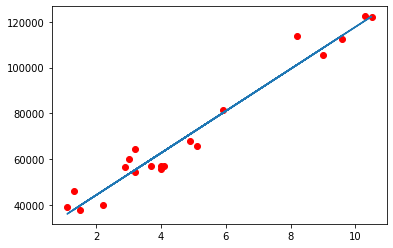

In [48]:
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,mymodel.predict(xtrain))
plt.show()

In [55]:
import pickle
with open('modelsave_pickle','wb') as file:
  pickle.dump(mymodel,file)

#load model and prediction

In [56]:
with open('modelsave_pickle','rb') as file:
  newmodel = pickle.load(file)

In [57]:
newmodel.predict([[5]])

array([71927.93600785])

In [58]:
newmodel.coef_

array([9158.13919873])

#joblib

In [60]:
from sklearn.externals import joblib
joblib.dump(mymodel, 'model_joblib')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model_joblib']

In [61]:
mymodel=joblib.load('model_joblib')

In [53]:
#Apply Gradient Descent
import numpy as np
import matplotlib.pyplot as plt
import math


0 0 0 6502955270.733334
9547.974 1520.06


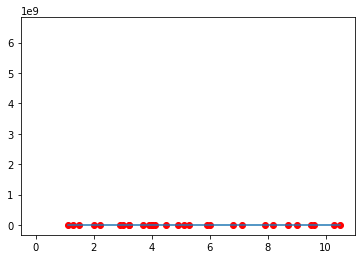

In [54]:
x=np.array([1,2,3,4,5])   # y=3x+2
y = np.array([5,8,11,14,17])
def gradient(x,y):
  a=0
  b=0
  rate=0.01
  n=len(x)
  plt.scatter(x,y,color='red')
  cost_old=0
  for i in range(1000):
    y_pred = a*x+b
    cost = (1/n)*sum([value**2 for value in (y - y_pred)])
    print(a,b,i,cost)
    plt.plot(x,y_pred, cost)
    ad = -(2/n)*sum(x*(y-y_pred))
    yd = -(2/n)*sum(y-y_pred)
    a = a - rate*ad
    b = b-rate*yd
    if math.isclose(cost,cost_old):
      break
    cost_old = cost
    return a,b

df = pd.read_csv("/content/sample_data/salaryData.csv")
x = np.array(df['YearsExperience'])
y = np.array(df['Salary'])

m,b = gradient(x,y)
print(m,b)